In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from common import acc_names, rate_gyro_names, sns_cm, plot_loss_accuracy
from sklearn.model_selection import train_test_split
import import_ipynb as ipynb

In [2]:
%%capture
m_knn = ipynb.NotebookLoader().load_module('movements_knn')

## Data

In [3]:
movement_classes = ['Squats', 'Jumping', 'Running', 'Walking']
features = acc_names + rate_gyro_names

### Training set

In [4]:
X = m_knn.X.to_numpy()
y = pd.get_dummies(m_knn.y, columns=['class']).to_numpy()

### Testing set

In [5]:
X_sample = m_knn.X_test_sample.to_numpy()
y_sample_true = pd.get_dummies(m_knn.y_true_sample, columns=['class']).to_numpy()

### Split training set into training and validation set.

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)

## Build a feedforward neural network that has 6 features as input and 4 classes as output. The network should have 2 hidden layers. You should try the network with 10 and 50 neurons in each layer. That is, you need two different models.

In [7]:
epochs = 100

## 10 Neurons

In [28]:
model_10 = Sequential([
    Dense(units=10, activation='relu', input_shape=(len(features),)),
    Dense(units=10, activation='relu'),
    Dense(len(movement_classes), activation='softmax')
])

## 50 Neurons

In [29]:
model_50 = Sequential([
    Dense(units=50, activation='relu', input_shape=(len(features),)),
    Dense(units=50, activation='relu'),
    Dense(len(movement_classes), activation='softmax')
])

##### Compile the models

In [30]:
model_10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the models

In [31]:
%%capture
history_10 = model_10.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs).history
history_50 = model_50.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs).history

##### model_50 = Sequential([
##### Dense(units=50, activation='elu', input_shape=(6,)),
##### Dense(units=50, activation='elu'),
##### Dense(4, activation='sigmoid')
##### ])

#### This results in a flat accuracy and loss. Loss_and_accuracy(epoch = 1) = loss_and_accuracy(epoch > 1)

#### Evaluate the model for training set

### Plot loss and accuracy for validation and training set.

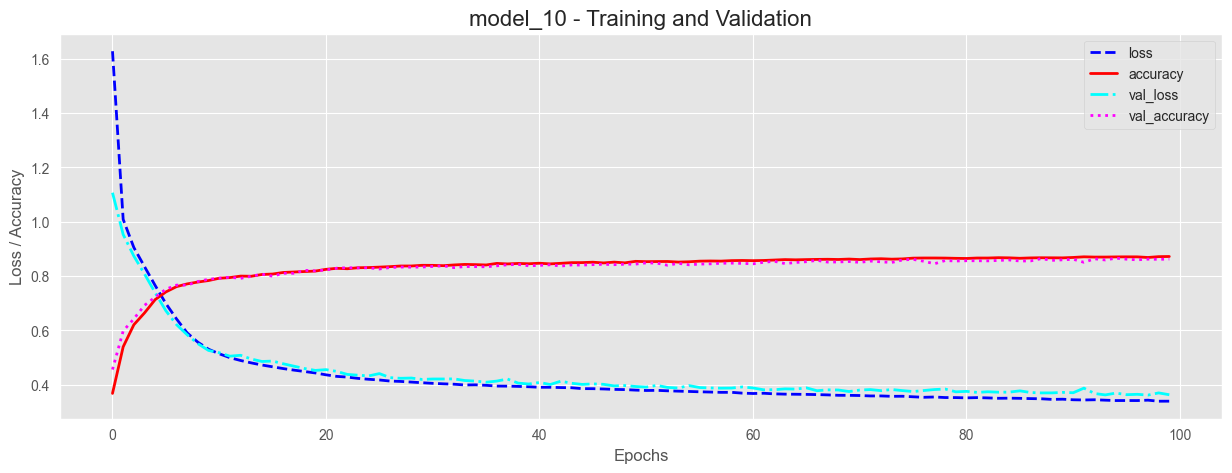

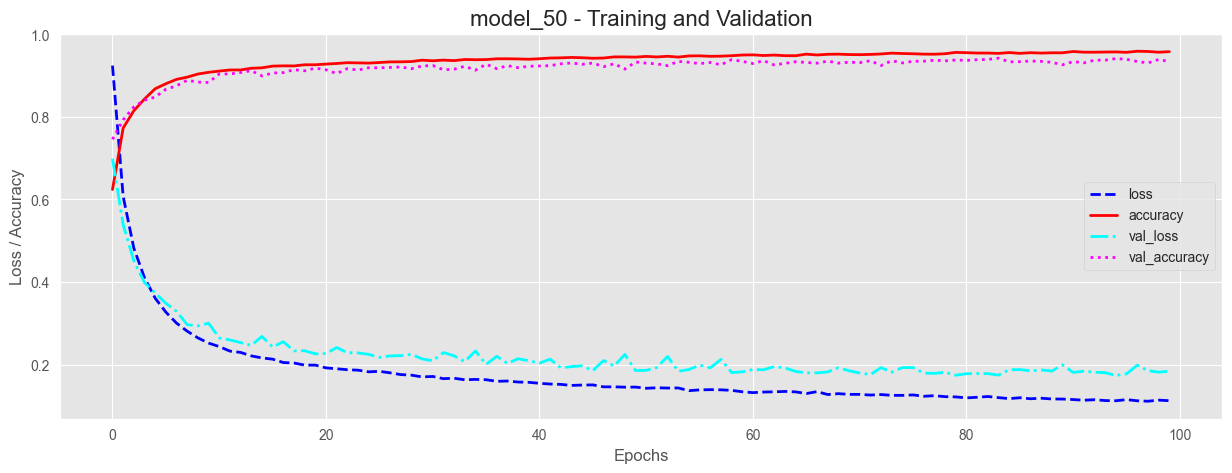

In [38]:
plot_loss_accuracy(history=history_10, name="model_10", same_graph=True)
plot_loss_accuracy(history=history_50, name="model_50", same_graph=True)

#### Here we can see that model_50 rapidly increases accuracy, suggesting that model_10 is slightly overfitting compared to model_10

#### Evaluate the model for training set

#### The resultant prediction is probabilities

In [33]:
%%capture
y_model_10_pred_prob = model_10.predict(X_sample)
y_model_50_pred_prob = model_50.predict(X_sample)

### For calculating the confusion matrix should you use evaluate or predict?
#### Calculate the confusion matrix and plot it. Explain the result.

### Confusion matrix of model_10

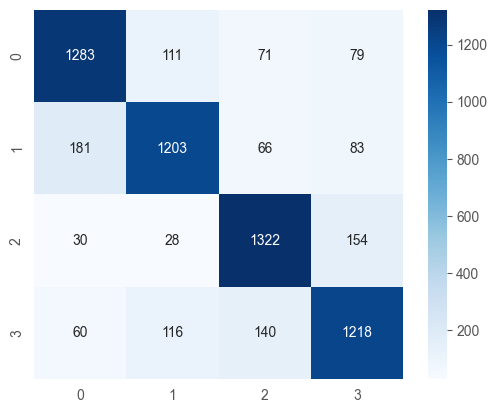

In [34]:
sns_cm(y_true= y_sample_true.argmax(axis=1), y_pred= y_model_10_pred_prob.argmax(axis=1))

### Confusion matrix of model_50

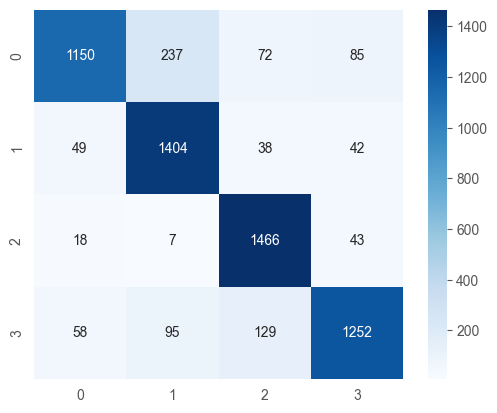

In [35]:
sns_cm(y_true= y_sample_true.argmax(axis=1), y_pred= y_model_50_pred_prob.argmax(axis=1))

In [36]:
%%capture
scores_10 = model_10.evaluate(X_sample, y_sample_true)
scores_50 = model_50.evaluate(X_sample, y_sample_true)

In [37]:
print(scores_10)
print(scores_50)
# display_loss_accuracy(scores_50, "model_50")

[0.48951971530914307, 0.8179007172584534]
[0.6334297060966492, 0.8579332828521729]
